# **MÓDULO 12 - Pratique**


Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [6]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico','Engenheiro', 'Estudante','Estudante'],
    'Salário': ['4500', '8000', '5000', '10000', '12000','15000', '1200','1500'],
    'Limite_Credito': ['2500', '4000', '4000', '1000', '10000','2000', '500','250'],
    'Historico_Inadimplencia': ['0', '0', '0', '1', '0','1', '0','1'],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento','Solteiro', 'Solteiro','Solteiro'],
    'Imovel_Proprio': ['0', '0', '0', '1', '1','1', '0','0']
}

df = pd.DataFrame(data)
df.head(10)

,Nome,Idade,Profissão,Salário,Limite_Credito,Historico_Inadimplencia,Estado_Civil,Imovel_Proprio
0,Alice,25,Engenheiro,4500,2500,0,Casamento,0
1,Joao,30,Médico,8000,4000,0,Casamento,0
2,Charlie,35,Professor,5000,4000,0,Solteiro,0
3,David,40,Advogado,10000,1000,1,Solteiro,1
4,Eva,45,Médico,12000,10000,0,Casamento,1
5,Diego,60,Engenheiro,15000,2000,1,Solteiro,1
6,Denize,22,Estudante,1200,500,0,Solteiro,0
7,Claudio,24,Estudante,1500,250,1,Solteiro,0


A proposta da atividade é que utilizem os dados do DataFrame Data e escolham apenas 3 gráficos que ajudem vocês a identificar quais fatores são os principais impulsionadores para aqueles que tem limite de crédito alto.

Durante a exploração de vocês podem utilizar mais de 3 gráficos mas deixem na entrega final apenas os 3 mais assertivos que contenham a informação da mensagem que querem passar, fiquem livres para utilizar as bibliotecas que quiserem para os gráficos.

Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

## 1º Gráfico

**Análise da Importância do Histórico de Inadimplência**:

A análise dos dados revela que o histórico de inadimplência é um fator determinante para a concessão de um bom limite de crédito. Mesmo indivíduos que possuem imóvel próprio apresentam um limite de crédito significativamente menor quando possuem registros de inadimplência. Isso demonstra que as instituições financeiras priorizam a confiabilidade no pagamento sobre outros aspectos, como patrimônio.

**Dados que Comprovam a Análise**:

**Indivíduos sem inadimplência:** Recebem limites de crédito mais altos, mesmo que não possuam imóvel.

**Indivíduos com inadimplência:** Têm limites de crédito reduzidos, mesmo possuindo imóvel próprio.

**Variação percentual:** A diferença entre os limites de crédito pode chegar a mais de 70%, dependendo do histórico de pagamentos.

<Figure size 1000x600 with 0 Axes>

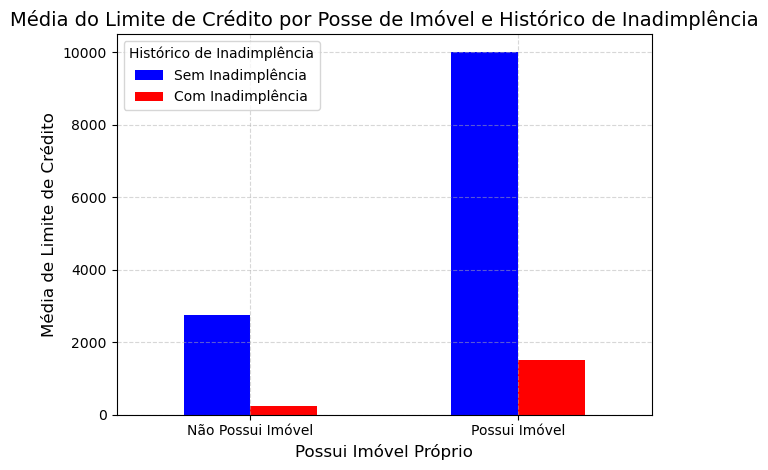

In [133]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')

dados_agrupados = df.groupby(['Imovel_Proprio', 'Historico_Inadimplencia'], observed=False)['Limite_Credito'].mean().unstack()

plt.figure(figsize=(10, 6))
dados_agrupados.plot(kind='bar', color=['blue', 'red'])

plt.title('Média do Limite de Crédito por Posse de Imóvel e Histórico de Inadimplência', fontsize=14)
plt.xlabel('Possui Imóvel Próprio', fontsize=12)
plt.ylabel('Média de Limite de Crédito', fontsize=12)
plt.xticks([0, 1], ['Não Possui Imóvel', 'Possui Imóvel'], rotation=0)
plt.legend(title='Histórico de Inadimplência', labels=['Sem Inadimplência', 'Com Inadimplência'])

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2º Gráfico

**Análise para Identificar o Cliente Ideal para a Instituição Financeira:**

Neste gráfico de dispersão, analisamos a relação entre **Limite de Crédito**, **Salário** e **Estado Civil** dos clientes. O objetivo é identificar padrões que possam ajudar a instituição financeira a definir o perfil do cliente ideal e entender os fatores que influenciam o limite de crédito concedido.

**Cliente Ideal:**
Identificamos um cliente com um limite de crédito significativo, 10 mil reais, que possui um salário de 12 mil reais e não tem histórico de inadimplência. Esse cliente é casado, representando assim o perfil ideal para uma instituição financeira, pois combina uma boa renda, responsabilidade financeira e uma vida estável.

**Outliers:**

**1. Primeiro Cliente:** 
Um cliente com o salário ainda maior (15 mil reais), possui um limite de crédito baixo (2 mil reais), esse fato pode ser explicado pelo seu histórico de inadimplência, que consta um debito passado, o que faz com que a instituição financeira perca a confiança nesse cliente.

**2. Segundo Cliente:**
Outro cliente, com salário alto (10 mil reais), encontra-se em uma situação semelhante à do primeiro outlier. Seu limite de crédito também é baixo (1 mil reais. Nesse caso, o cliente é solteiro, o que gera um ponto de desconfiança adicional por parte da instituição financeira.

**Relação entre Salário e Limite de Crédito**:
Clientes com salários mais altos tendem a receber limites de crédito maiores, desde que não tenham histórico de inadimplência.

**Influência do Estado Civil:**
Clientes casados tendem a ter limites de crédito mais altos em comparação com clientes solteiros, possivelmente devido a uma percepção de maior estabilidade financeira.

**Idade como Fator Adicional:**
Clientes mais velhos carregam um fator de confiabilidade, especialmente aqueles com uma longa história de relacionamento positivo com a instituição financeira e estabilidade financeira comprovada. Por outro lado, clientes mais jovens, como os estudantes, tendem a ter limites de crédito mais baixos, principalmente devido à baixa renda e à falta de histórico creditício consolidado.

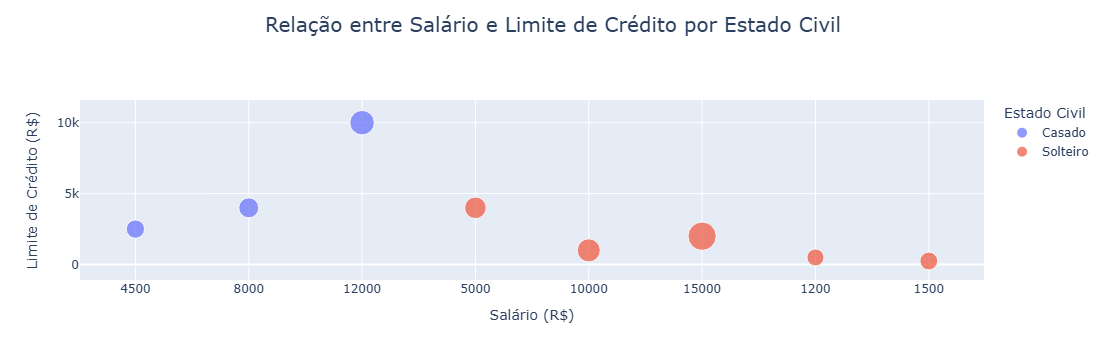

In [121]:
df['Estado_Civil'] = df['Estado_Civil'].replace('Casamento', 'Casado')
fig = px.scatter(df, 
                 x='Salário', 
                 y='Limite_Credito', 
                 color="Estado_Civil", 
                 size='Idade', 
                 hover_data=['Historico_Inadimplencia'],
                 labels={'Limite_Credito': 'Limite de Crédito (R$)', 'Salário': 'Salário (R$)', 'Estado_Civil': 'Estado Civil',},
                 title= 'Relação entre Salário e Limite de Crédito por Estado Civil')

fig.update_layout(
    title={
        'text': 'Relação entre Salário e Limite de Crédito por Estado Civil',
        'y': 0.95, 
        'x': 0.5,   
        'xanchor': 'center', 
        'yanchor': 'top',     
        'font': {'size': 20}})
        
fig.show()


## 3º Gráfico

**Análise da correlação entre profissão e limite de crédito:**

O gráfico mostra que estudantes têm os menores limites de crédito, provavelmente devido à falta de histórico financeiro. 
Profissões como advogados, professores e engenheiros também apresentam limites reduzidos, possivelmente por fatores como histórico de inadimplência, renda insuficiente ou perfil de gastos elevados. 
Isso destaca a importância de um histórico financeiro sólido para a concessão de crédito.

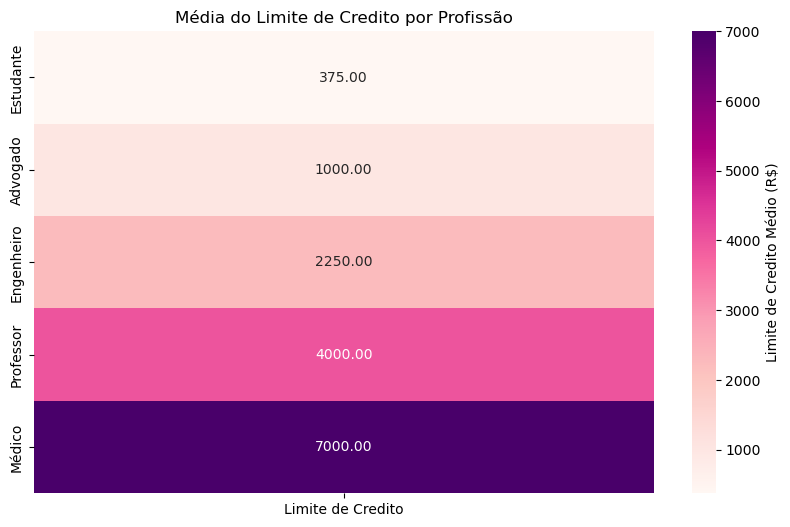

In [135]:
df_heat = df.groupby('Profissão')['Limite_Credito'].mean().reset_index()
df_heat = df_heat.rename(columns={'Limite_Credito': 'Limite de Credito'})

df_heat_sorted = df_heat.sort_values(by='Limite de Credito', ascending=True)

plt.figure(figsize=(10, 6))
sns.heatmap(
            df_heat_sorted.set_index('Profissão'), 
            annot=True,  
            cmap='RdPu', 
            fmt='.2f',  
            cbar_kws={'label': 'Limite de Credito Médio (R$)'})

plt.title('Média do Limite de Credito por Profissão')
plt.xlabel('')  
plt.ylabel('')
plt.show()

## Conclusão:

Podemos concluir que as instituições financeiras priorizam perfis de **baixo risco**, ou seja, indivíduos que apresentam um bom histórico de relacionamento com credores e demonstram estabilidade financeira.

Dentre os fatores analisados, o **histórico de inadimplência** é o aspecto mais relevante para a concessão de crédito, uma vez que ele reflete diretamente a capacidade do indivíduo de honrar seus compromissos financeiros. Em seguida, outros fatores também influenciam a decisão, como:

**Bens possuídos:** A posse de imóveis ou outros ativos pode aumentar a confiança das instituições financeiras.

**Salário:** Uma renda estável e compatível com o nível de gastos é essencial para garantir a capacidade de pagamento.

**Idade:** Indivíduos mais velhos tendem a ter um histórico financeiro mais consolidado, o que pode ser visto como um indicador de menor risco.

